In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_wam = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_wam.xvg")
path_wch = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_wch.xvg")
path_wop = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_wop.xvg")
path_wc36 = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_wc36.xvg")
path_mam = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_mam.xvg")
path_mch = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_mch.xvg")
path_mop = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_mop.xvg")
path_mc36 = os.path.join(r"C:\Users\vaibh\Documents\Analysis\CodeFiles\nwater3\nw3_mc36.xvg")

In [3]:
data = []
ff = ["wam", "wch", "wop", "wc36", "mam", "mch", "mop", "mc36"]

In [4]:
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as f:
        line = f.readlines()
        flag=False
        tmp = []
        for x in line:
            if not flag:
                if x.strip().startswith('@TYPE'):
                    flag = True
                continue
            else:
                tmp.append(int(x.split()[1]))    
        data.append(tmp)
        del tmp

In [5]:
len(data[0])

30001

In [6]:
col = list(range(700000, int(1e+06)+1, 10))

df = pd.DataFrame(data=data, columns=col, index=ff)
df = df.transpose()
df.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
700000,3,9,6,5,2,8,11,5
700010,4,6,5,5,2,11,13,4
700020,5,8,5,3,3,6,10,3
700030,4,13,2,5,3,10,15,6
700040,4,7,6,4,1,11,10,4


In [7]:
df.tail()

,wam,wch,wop,wc36,mam,mch,mop,mc36
999960,6,5,4,8,7,14,13,5
999970,5,2,4,10,10,10,14,6
999980,5,3,5,9,9,16,11,5
999990,6,5,4,11,10,12,14,8
1000000,5,3,4,7,15,10,12,4


In [8]:
# Saving Dataframes to exel files
df.to_excel("nwater3.xlsx", index=True)

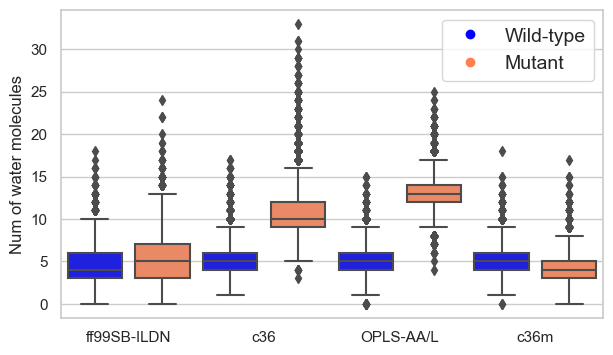

In [9]:
plt.figure(figsize=(7, 4))
sns.set_theme(style="whitegrid")
palette = {'wam': 'blue', 'wch': 'blue', 'wop': 'blue', 'wc36': 'blue',
           'mam': 'coral', 'mch': 'coral', 'mop': 'coral', 'mc36': 'coral'}
# Boxplot
sns.boxplot(data=df[['wam', 'mam', 'wch', 'mch', 'wop', 'mop', 'wc36', 'mc36']], palette=palette)
plt.xticks([0.5, 2.5, 4.5, 6.5], ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m'])
# plt.ylim(0,10)

plt.ylabel('Num of water molecules')

# Create custom legend labels
legend_labels = {'Wild-type': 'blue', 'Mutant': 'coral'}
custom_legend = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') for label, color in legend_labels.items()]

# Add legend
plt.legend(handles=custom_legend, fontsize=14)

plt.savefig('nw_box3.png', dpi=600)
plt.show()

In [10]:
# RUNNING AVG
window_size = 250
df_avg = df.rolling(window=window_size).mean()
df_avg.dropna(inplace=True)
df_avg.head()

,wam,wch,wop,wc36,mam,mch,mop,mc36
702490,4.768,3.852,4.908,4.472,3.076,9.992,13.480,4.628
702500,4.772,3.828,4.908,4.468,3.084,10.000,13.500,4.612
702510,4.776,3.812,4.908,4.464,3.084,10.000,13.524,4.616
702520,4.776,3.792,4.908,4.468,3.096,10.024,13.568,4.628
702530,4.776,3.752,4.920,4.472,3.088,10.032,13.572,4.628


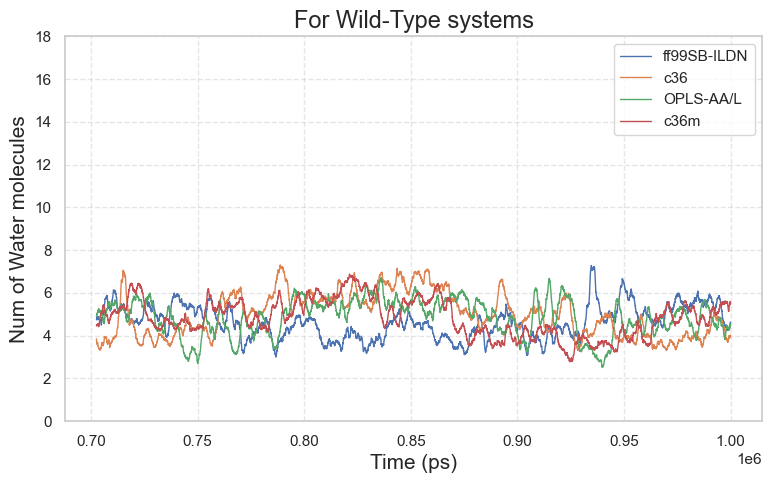

In [15]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['wam', 'wch', 'wop', 'wc36']], linewidth=1.0)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('Num of Water molecules', fontsize=15)
plt.ylim(0, 18)
plt.title('For Wild-Type systems', fontsize=17)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
# plt.legend(lines, legend_labels, fontsize=13, bbox_to_anchor=(1, 1))
# plt.legend(lines, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)
plt.legend(lines, legend_labels, fontsize=11)

# Saving and showing plot
plt.savefig('nw_wt3.png', dpi=600)
plt.show()


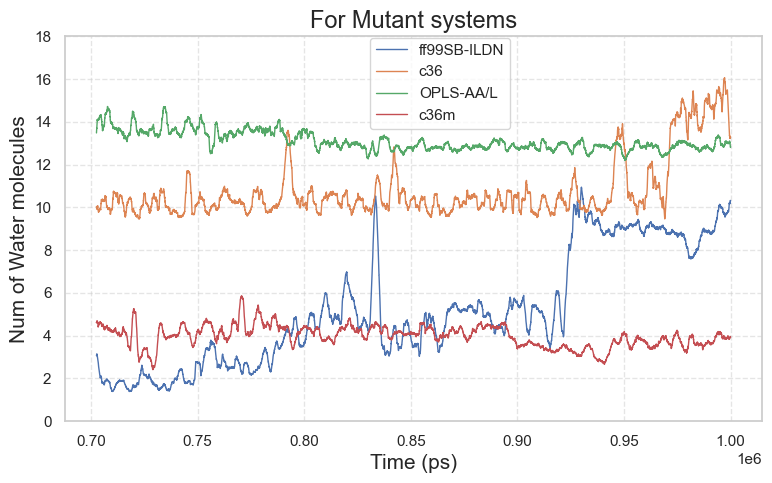

In [16]:
plt.figure(figsize=(9, 5))

# Plotting the lines
lines = plt.plot(df_avg[['mam', 'mch', 'mop', 'mc36']], linewidth=1.0)

# Setting grid
plt.grid(True, linestyle='--', alpha=0.5)

# Setting labels and title
plt.xlabel('Time (ps)', fontsize=15)
plt.ylabel('Num of Water molecules', fontsize=15)
plt.ylim(0, 18)
plt.title('For Mutant systems', fontsize=17)

# Setting legend labels
legend_labels = ['ff99SB-ILDN', 'c36', 'OPLS-AA/L', 'c36m']
plt.legend(lines, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)
plt.legend(lines, legend_labels, bbox_to_anchor=(0.65, 0.74), fontsize=11)

# Saving and showing plot
plt.savefig('nw_mt3.png', dpi=600)
plt.show()
